In [5]:
import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs

# set so that these display properly on black backgrounds
pl.rcParams['figure.facecolor']='w'

from spectral_cube import SpectralCube

from pvextractor import extract_pv_slice, Path

In [22]:
cube = SpectralCube.read('spw3.sis.cm64-cont.imsub33.fits')
cube

SpectralCube with shape=(33, 256, 256) and unit=Jy / beam:
 n_x:    256  type_x: RA---SIN  unit_x: deg    range:    83.810214 deg:   83.810712 deg
 n_y:    256  type_y: DEC--SIN  unit_y: deg    range:    -5.375404 deg:   -5.374909 deg
 n_s:     33  type_s: VOPT      unit_s: m / s  range:   -32000.000 m / s:   32000.000 m / s

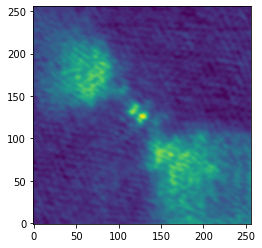

In [23]:
pl.imshow(cube[25].value, origin='lower')


In [156]:
path = Path([(0,100), (150,250)])


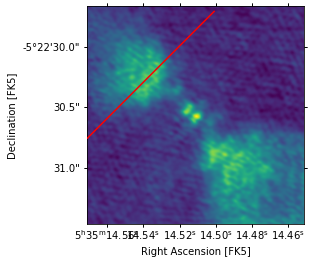

In [157]:
ax = pl.subplot(111, projection=cube.wcs.celestial)
ax.imshow(cube[25].value)
path.show_on_axis(ax, spacing=1, color='r')
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")


In [177]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=5)
pvdiagram


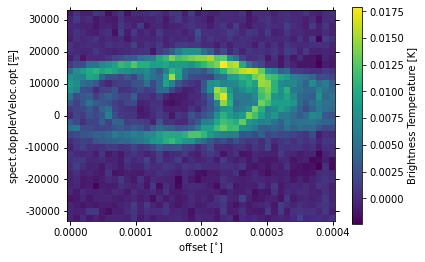

In [178]:
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")


# ww = wcs.WCS(pvdiagram.header)

ax = pl.subplot(111, projection=ww)
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
cb.set_label("Brightness Temperature [K]")

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcmin]")

In [179]:

# we will use the peak intensity for future display
# the warning here can be ignored because the cube is small,
# but we don't silence it because it's a legit warning when dealing with big cubes
mx = cube.max(axis=0).value

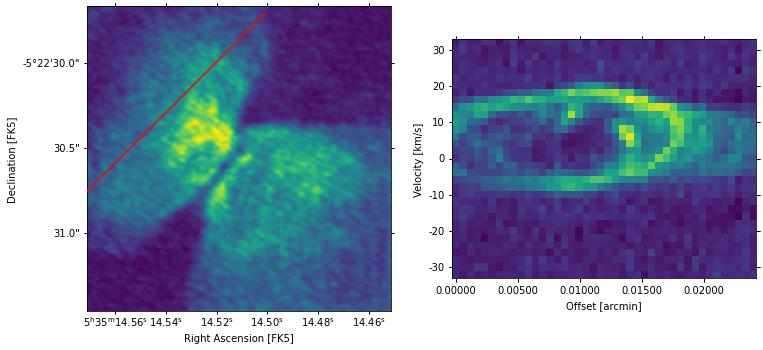

In [180]:
pl.figure(figsize=(12,6))
ax = pl.subplot(121, projection=cube.wcs.celestial)
ax.imshow(mx)
path.show_on_axis(ax, spacing=1, color='r')

ww = wcs.WCS(pvdiagram.header)
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")

ax = pl.subplot(122, projection=ww)
im = ax.imshow(pvdiagram.data)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcmin]")

In [183]:
pip install astroquery

     |████████████████████████████████| 4.5 MB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 888 kB 5.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [184]:
from astropy.modeling import models, fitting
from astroquery.vizier import Vizier
import scipy.optimize


In [186]:
model = models.Gaussian1D()

In [192]:
fitter = fitting.LevMarLSQFitter() 
best_fit = fitter(model, cube.wcs.wcs.radesys, cube.wcs.wcs.radesys)
fitter_gauss = fitting.LevMarLSQFitter()


ValueError: could not convert string to float: 'FK5'